# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Assign it to a variable called chipo.

In [1]:
import pandas as pd

In [2]:
df_chipo = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

### See the first 10 entries

In [3]:
df_chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What is the number of observations in the dataset?

In [4]:
# Solution 1
df_chipo.tail(1)

,order_id,quantity,item_name,choice_description,item_price
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [5]:
# Solution 2
df_chipo.size

23110

In [6]:
df_chipo.shape

(4622, 5)

In [7]:
df_chipo.value_counts

<bound method DataFrame.value_counts of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                

In [8]:
rows = 4622
columns = 5
total_observations = rows * columns
total_observations

23110

### What is the number of columns in the dataset?

In [9]:
df_chipo.count(axis=0)

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

### Print the name of all the columns.

In [10]:
df_chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### How is the dataset indexed?

In [11]:
df_chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Which was the most-ordered item? 

In [12]:
df_chipo['item_name'].mode()

0    Chicken Bowl
Name: item_name, dtype: object

### For the most-ordered item, how many items were ordered?

In [13]:
df_chipo.item_name.value_counts(sort=True)

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

<AxesSubplot:>

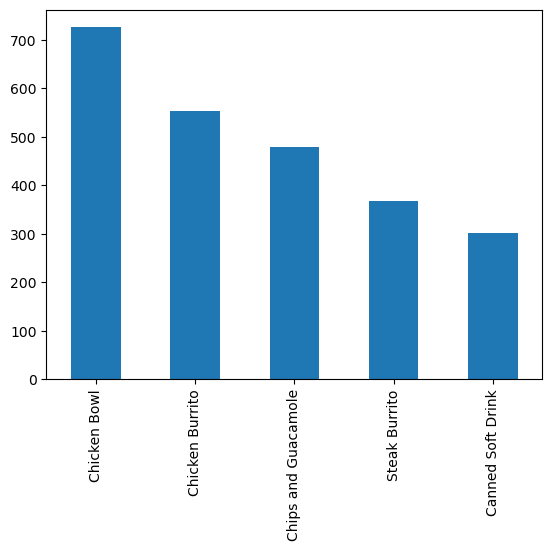

In [14]:
import matplotlib.pyplot as plt
viz = df_chipo.item_name.value_counts(sort=True).head(5)
viz.plot(kind ='bar')

### What was the most ordered item in the choice_description column?

In [15]:
df_chipo['choice_description'].mode()

0    [Diet Coke]
Name: choice_description, dtype: object

### How many items were orderd in total?

In [16]:
df_chipo.choice_description.value_counts(sort=True)

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

<AxesSubplot:>

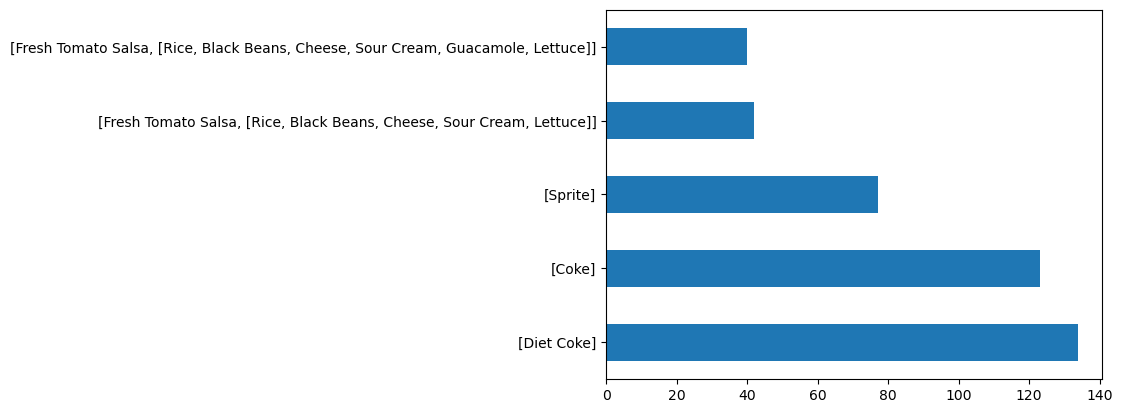

In [17]:
viz2 = df_chipo.choice_description.value_counts(sort=True).head(5)
viz2.plot(kind ='barh')

### Turn the item price into a float

####a. Check the item price type

In [18]:
df_chipo.item_price.dtype

dtype('O')

In [19]:
type(df_chipo.item_price)

pandas.core.series.Series

####b. Create a lambda function and change the type of item price

In [20]:
df_chipo.item_price.str.replace('$','', regex=True).astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [21]:
df_chipo.item_price = df_chipo['item_price'].str.slice(1).astype(float)

####c. Check the item price type

In [22]:
df_chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### How much was the revenue for the period in the dataset?

In [23]:
df_chipo.item_price*df_chipo.quantity

0        2.39
1        3.39
2        3.39
3        2.39
4       33.96
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Length: 4622, dtype: float64

In [24]:
revenue = (df_chipo.item_price*df_chipo.quantity).sum()
revenue

39237.02

### How many orders were made in the period?

In [25]:
df_chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [26]:
total_orders = df_chipo.order_id.value_counts().count()
total_orders

1834

### What is the average revenue amount per order?

In [27]:
# Solution 1
Average_revenue =revenue/total_orders
Average_revenue

21.39423118865867

In [28]:
# Solution 2
((df_chipo.item_price*df_chipo.quantity).sum().mean())/df_chipo.order_id.value_counts().count()


21.39423118865867

### How many different items are sold?

In [29]:
df_chipo.item_name.value_counts().count()

50